<a href="https://colab.research.google.com/github/emilytsen/SoloWiseAi/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#montar o Google Drive no Colab para acessar as imagens

Mounted at /content/drive


In [67]:
import os #navegate through browse folders
import cv2
##import numpy as np
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_logical_devices('CPU')

In [4]:
gpus

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
#limit tensor flow so it doesent guive future bugs

###Remove dodgy imeges

In [6]:
import cv2 #computer vision
import imghdr #see file extentions
from matplotlib import pyplot as plt #extention that read and shows the image

In [7]:
data_dir = '/content/drive/MyDrive/fatec/pi/datasets/sand'

In [8]:
image_exts = ['jpg', 'jpeg']
#image extentions

In [9]:
os.listdir(data_dir)

['black', 'red']

In [13]:
os.listdir(os.path.join(data_dir, 'black')) #Show all images from back

['_1220417.JPG',
 '_1220418.JPG',
 '_1220419.JPG',
 '_1220420.JPG',
 '_1220421.JPG',
 '_1220422.JPG',
 '_1220423.JPG',
 '_1220424.JPG',
 '_1220425.JPG',
 '_1220426.JPG',
 '_1220427.JPG',
 '_1220428.JPG',
 '_1220429.JPG',
 '_1220430.JPG',
 '_1220431.JPG',
 '_1220433.JPG',
 '_1220434.JPG',
 '_1220435.JPG',
 '_1220448.JPG',
 '_1220450.JPG',
 '_1220451.JPG',
 '_1220452.JPG',
 '_1220453.JPG',
 '_1220454.JPG',
 '_1220455.JPG',
 '_1220456.JPG',
 '_1220457.JPG',
 '_1220458.JPG',
 '_1220459.JPG',
 '_1220460.JPG',
 '_1220461.JPG',
 '_1220462.JPG',
 '_1220463.JPG',
 '_1220464.JPG',
 '_1220465.JPG',
 '_1220467.JPG',
 '_1220468.JPG',
 '_1220469.JPG',
 '_1220470.JPG',
 '_1220471.JPG',
 '_1220472.JPG',
 '_1220473.JPG',
 '_1220474.JPG',
 '_1220475.JPG',
 '_1220476.JPG',
 '_1220477.JPG',
 '_1220478.JPG',
 '_1220479.JPG',
 '_1220480.JPG',
 '_1220481.JPG',
 '_1220482.JPG',
 '_1220483.JPG',
 '_1220484.JPG',
 '_1220485.JPG',
 '_1220486.JPG',
 '_1220487.JPG',
 '_1220488.JPG',
 '_1220489.JPG',
 '_1220490.JPG

In [14]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/fatec/pi/datasets/sand', 'black', 'IMG_6932.jpeg')) #read one the image as a numpy array

In [15]:
img_1 = cv2.imread(os.path.join('/content/drive/MyDrive/fatec/pi/datasets/sand', 'red', 'IMG_7002.jpeg')) #read one the image as a numpy array

In [16]:
img.shape

(3024, 4032, 3)

In [17]:
img_1.shape

(4032, 3024, 3)

In [18]:
img

array([[[168, 197, 211],
        [167, 196, 210],
        [167, 196, 210],
        ...,
        [112, 137, 153],
        [112, 137, 153],
        [112, 137, 153]],

       [[170, 199, 213],
        [169, 198, 212],
        [168, 197, 211],
        ...,
        [112, 137, 153],
        [112, 137, 153],
        [113, 138, 154]],

       [[169, 198, 212],
        [169, 198, 212],
        [170, 199, 214],
        ...,
        [113, 138, 154],
        [113, 138, 154],
        [114, 139, 155]],

       ...,

       [[182, 186, 180],
        [182, 186, 180],
        [181, 185, 179],
        ...,
        [158, 139, 118],
        [158, 139, 118],
        [158, 139, 118]],

       [[183, 187, 181],
        [182, 186, 180],
        [182, 186, 180],
        ...,
        [158, 139, 118],
        [159, 140, 119],
        [159, 140, 119]],

       [[183, 187, 181],
        [183, 187, 181],
        [182, 186, 180],
        ...,
        [159, 140, 119],
        [160, 141, 120],
        [160, 141, 120]]

In [19]:
img.shape #2672px de altura, 4000px de largura e 3 canais (foto colorida)

(3024, 4032, 3)

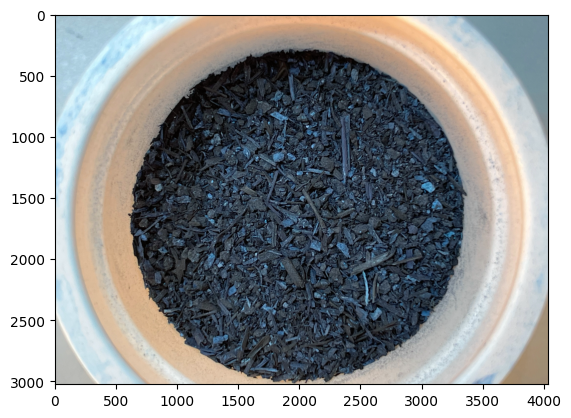

In [20]:
plt.imshow(img)

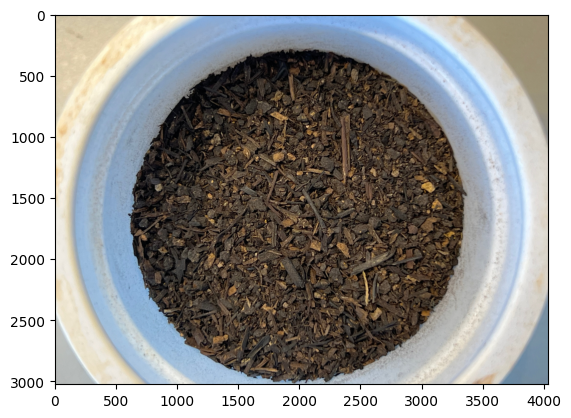

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #converter as cores originais com CV2
plt.show() #mostrar apenas a imagem, sem o código

###Load the Data

In [ ]:
for image_class in os.listdir(data_dir): #looping through the data directory -> red and black
  for image in os.listdir(os.path.join(data_dir, image_class)): #looping through every image in the image_class
    image_path = os.path.join(data_dir, image_class, image) #storing the image on image_path
    try:
      img = cv2.imread(image_path) #check if ti can load the images on open CV
      tip = imghdr.what(image_path) #check if the images matches the paths
      if tip not in image_exts:
        print('image is not in ext list{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with image{}'.format(image_path))

In [23]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
#data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/fatec/pi/datasets/sand', batch_size=8, image_size=(128, 128))
#defining batch size with 8 images per batch
#defining the image size to 128, 128

In [25]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/fatec/pi/datasets/sand')
#data pipeline from keras, that builds a dataset with the lables and classes
#por padrão vem 32 iamgens per batch

Found 437 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()
#converting the data into a numpy iterator to alow to access the generator from the pipeline

In [27]:
data_iterator

In [28]:
batch = data_iterator.next()
#grabing one batch os data

In [29]:
batch

(array([[[[102.69922 ,  98.69922 ,  95.69922 ],
          [102.21875 , 100.375   ,  99.21875 ],
          [100.34766 ,  96.34766 ,  93.91016 ],
          ...,
          [145.47266 , 145.47266 , 156.03516 ],
          [148.13867 , 146.13867 , 157.13867 ],
          [146.19531 , 145.58203 , 152.01367 ]],
 
         [[102.98242 ,  96.88867 ,  94.40625 ],
          [ 99.43945 ,  98.      ,  96.146484],
          [ 97.69336 ,  96.84961 ,  94.84961 ],
          ...,
          [146.3125  , 147.84375 , 160.15625 ],
          [143.62695 , 144.61719 , 148.85547 ],
          [147.58984 , 146.6875  , 152.58984 ]],
 
         [[102.92969 , 100.96484 , 100.375   ],
          [101.25    ,  98.46875 ,  97.01172 ],
          [102.05078 ,  98.05078 ,  98.23828 ],
          ...,
          [148.96875 , 148.15625 , 159.75    ],
          [146.59375 , 146.59375 , 156.66797 ],
          [147.16211 , 145.97461 , 157.12695 ]],
 
         ...,
 
         [[132.9668  , 125.71875 , 123.68359 ],
          [130.900

In [30]:
batch[0].shape
#32 images per batch
#size = 256, 256
#3 = color

(32, 256, 256, 3)

In [31]:
batch[1]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

In [32]:
batch[1]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

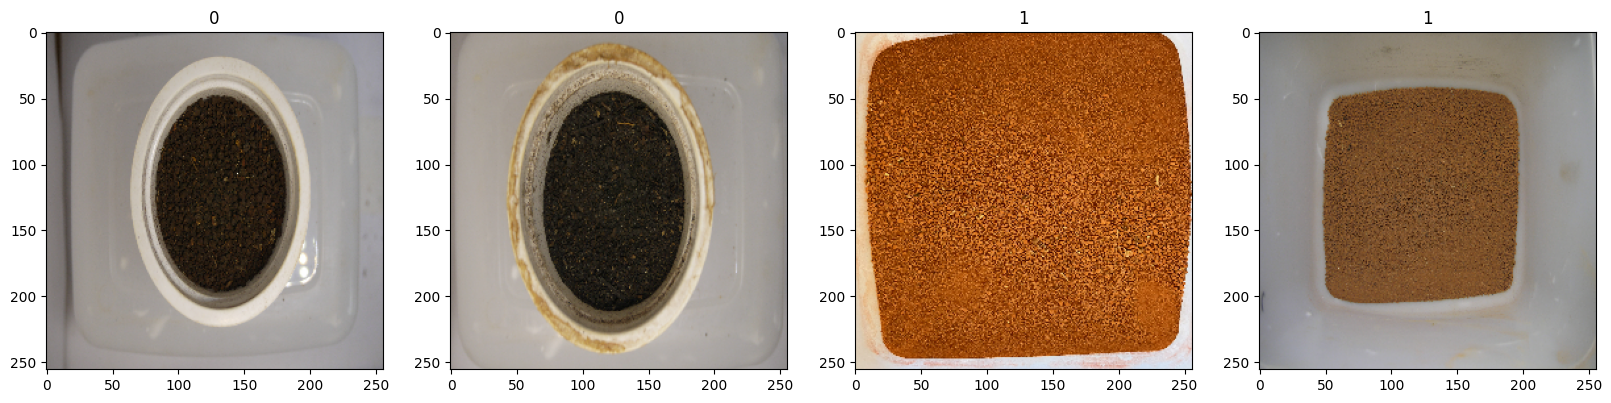

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [34]:
batch[0].min()
# representa o valor mínimo dos pixels nas imagens contidas na primeira amostra do lote.
#os pixels em imagens são representados por valores inteiros entre 0 e 255 (em caso de imagens de 8 bits por canal de cor).
#Portanto, se o valor mínimo retornado for 0, isso indica que não há pixels mais escuros do que o valor mínimo representável (preto absoluto).

0.0

In [35]:
batch[0].max()
#255 representa a intensidade máxima (branco absoluto)

255.0

In [36]:
scaled = batch[0] / 255 #dividimos os valores por 255 para que o valor min e máximo seja igual a 1 ou 0

In [37]:
scaled.min()

0.0

In [38]:
scaled.max()

1.0

#Preprocess data
##1- scale data


In [39]:
data = data.map(lambda x, y: (x/255, y))
# x = imagens e y = variável alvo

In [40]:
scaled_iterator = data.as_numpy_iterator()

In [41]:
batch = scaled_iterator.next()

In [42]:
batch[0].max()

1.0

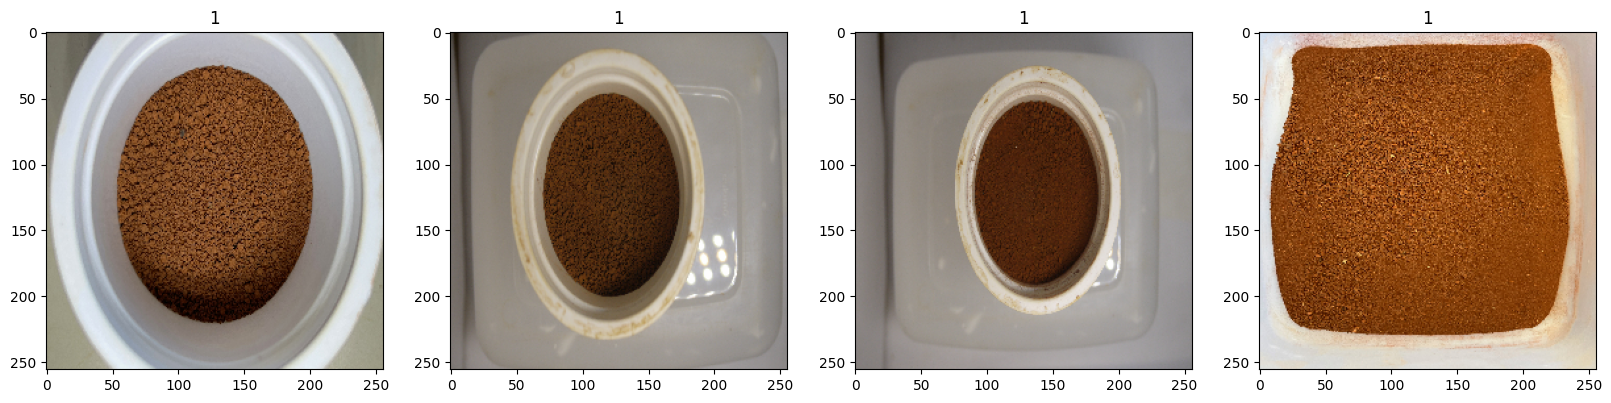

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

##2- Slit Data

In [45]:
len(data)
#14 batches

14

In [46]:
train_size = int(len(data)*.7)
#train 7% = 9
val_size = int(len(data)*.2)+1
#validation 2% +1 = 3
test_size = int(len(data)*.1)+1
#test 1% +1 = 2

In [47]:
train_size + val_size + test_size

14

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#take and skip are 2 tensorflow functions

In [49]:
len(test)

2

#Deep Model
###Build deep learning model

In [50]:
from tensorflow.keras.models import Sequential
#Sequential => usado para modelos com apenas um input que corre na rede neural (simples)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
#Conv2D => permite a detecção de padrões e características específicas nas imagens
#MaxPooling2D =>  retorna o valor máximo de cada região resultando em uma redução da resolução espacial da entrada
#Dense => Em uma camada Dense, cada neurônio está conectado a todos os neurônios da camada anterior.
#Flatten =>  usada para "achatrar" o tensor resultante das camadas convolucionais em um vetor unidimensional, que pode ser alimentado nas camadas densas.

In [51]:
model = Sequential()

In [ ]:
# #camadas da rede neural

# #1° camada precisa ter um input
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
# #vai ser aplicado 16 filtros de análise com 3px por 3px analisando os pixels de 1 em 1
# #activation => resgatando os dados e aplicando eles em um gráfico tipo relu para uma melhor interpretação da IA
# model.add(MaxPooling2D())
# #condensar a informação

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# #agora 32 filtros
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())
# #achatando a imagem que foi alterada pelas camadas e retornando 1 valor como output

# model.add(Dense(256, activatioin='relu'))
# #camada densa com 256 neurônios
# model.add(Dense(1, activatioin='sigmoid'))
# #camada final com 1 único neuronio retornando valores de resposta 0 (preto) ou 1 (vermelho)

In [52]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#adam = optimizador que se baseia em uma combinação do método de descida de gradiente estocástico (SGD)
#losses.BinaryCrossentropy() => classificação binária, onde o objetivo é atribuir a uma das duas classes possíveis.
#metrics=['accuracy'] => indicando que a maquina deve voltar 0 ou 1

In [54]:
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#Train

In [55]:
logdir = '/content/drive/MyDrive/fatec/pi/datasets/logs'
#direcionanado a variavel para onde vamos armazenar os logs (informações de treinamento) do TensorFlow

In [56]:
tensorboard_callback =  tf.keras.callbacks.TensorBoard(log_dir=logdir)
#direcionando o TF lá

In [57]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])
#método fit faz parte do treinamento => vai pegar os dados de treinamento, definir quanto tempo de treinamento (epochs=20), passar pelos dados de validação (validation_data=val) e por fim vai chamar os dados finais para o tensorboard_callback

Epoch 1/15
9/9 [==============================] - 149s 14s/step - loss: 0.8716 - accuracy: 0.4931 - val_loss: 0.6002 - val_accuracy: 0.8125
Epoch 2/15
9/9 [==============================] - 153s 14s/step - loss: 0.4068 - accuracy: 0.8715 - val_loss: 0.2637 - val_accuracy: 0.9479
Epoch 3/15
9/9 [==============================] - 142s 14s/step - loss: 0.1770 - accuracy: 0.9549 - val_loss: 0.2294 - val_accuracy: 0.8646
Epoch 4/15
9/9 [==============================] - 143s 14s/step - loss: 0.1091 - accuracy: 0.9479 - val_loss: 0.1130 - val_accuracy: 0.9583
Epoch 5/15
9/9 [==============================] - 148s 14s/step - loss: 0.0843 - accuracy: 0.9688 - val_loss: 0.1008 - val_accuracy: 0.9688
Epoch 6/15
9/9 [==============================] - 106s 9s/step - loss: 0.0753 - accuracy: 0.9688 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 7/15
9/9 [==============================] - 143s 14s/step - loss: 0.0268 - accuracy: 0.9965 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 8/15
9/9 [=====

In [58]:
hist.history

{'loss': [0.8715991973876953,
  0.40678998827934265,
  0.17701703310012817,
  0.10913767665624619,
  0.08431829512119293,
  0.07526274025440216,
  0.02682238258421421,
  0.008841905742883682,
  0.00792175717651844,
  0.00450719241052866,
  0.004153389949351549,
  0.0011154529638588428,
  0.0006805876619182527,
  0.0006089464295655489,
  0.00041106450953520834],
 'accuracy': [0.4930555522441864,
  0.8715277910232544,
  0.9548611044883728,
  0.9479166865348816,
  0.96875,
  0.96875,
  0.9965277910232544,
  0.9965277910232544,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.600182056427002,
  0.2637203335762024,
  0.2293606549501419,
  0.11303815990686417,
  0.10076912492513657,
  0.015231537632644176,
  0.006990867201238871,
  0.014769823290407658,
  0.004481531213968992,
  0.00525888055562973,
  0.0016519803320989013,
  0.00033703455119393766,
  0.0011538905091583729,
  0.0009490453521721065,
  0.00020136039529461414],
 'val_accuracy': [0.8125,
  0.9479166865348816,
  

#Plot Performace

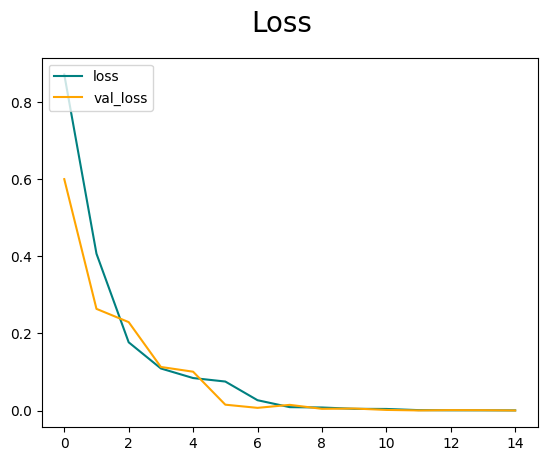

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
#visualizar por meio de um gráfico os dados gerados do treinamento

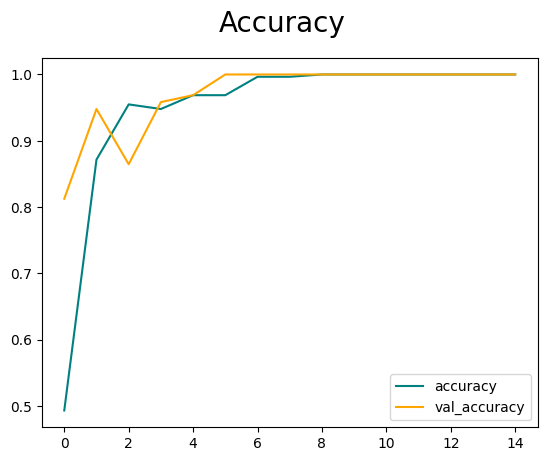

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

#Evaluate performace
##1- Evaluate

In [69]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import cv2

In [62]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [63]:
for batch in test.as_numpy_iterator():
#trazendo os batch de trinamento (2)
  X, y = batch
  #destrinchando os batchs: X => set of images and y => are the true values
  yhat = model.predict(X)
  #estamos usando o modelo (model) para fazer previsões (predict) nas imagens de teste (X). O resultado é armazenado na variável yhat, que contém as previsões feitas pelo modelo.
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  # Isso permite calcular métricas de desempenho do modelo, como precisão, recall e acurácia, para avaliar o seu desempenho.

1/1 [==============================] - 0s 460ms/step


In [64]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')
#resultado em tudo com 100%

Precision:1.0, Recall:1.0, Accuracy:1.0


#2- test

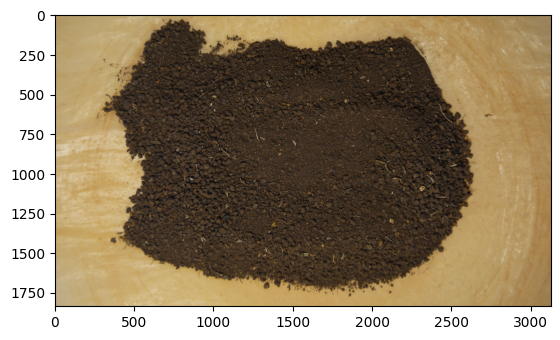

In [71]:
img = cv2.imread('/content/drive/MyDrive/fatec/pi/datasets/blacktest.JPG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#pegando imagens de teste

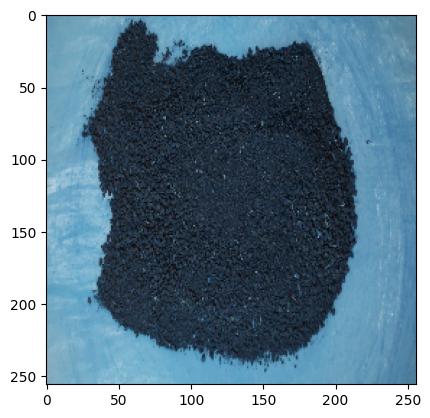

In [72]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()
#redimensionando a imagem

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))
#resize => uma imagem que foi redimensionada e dividida por 255. pois coloca os valores de pixel no intervalo de 0 a 1.
#np.expand_dims => adiciona uma dimensão extra à imagem de entrada
#predict => usada para obter as previsões do modelo
#yhat => resultado da previsão é armazenado na variável yhat, que conterá as previsões feitas pelo modelo para a imagem de entrada.

1/1 [==============================] - 0s 66ms/step


In [74]:
yhat
#array([[0.00022392]], dtype=float32) => mostra que a IA preveu corretamente já que o número é bem próximo de 0 (0.0002)

array([[1.4949891e-06]], dtype=float32)

In [75]:
if yhat > 0.5:
  print(f'Previsão do solo é: vermelho')
else:
  print(f'Previsão do solo é: preto')

Previsão do solo é: preto


#Save the model

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save(os.path.join('/content/drive/MyDrive/fatec/pi/datasets/models', 'redblackmodel.h5'))

In [78]:
new_model = load_model(os.path.join('/content/drive/MyDrive/fatec/pi/datasets/models', 'redblackmodel.h5'))

In [79]:
new_model

In [80]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 105ms/step


In [81]:
if yhatnew > 0.5:
  print(f'Previsão do solo é: vermelho')
else:
  print(f'Previsão do solo é: preto')

Previsão do solo é: preto
